# Load dataset

In [70]:
import pandas as pd

In [71]:
train_df=pd.read_csv('train.csv')
train_df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [72]:
test_df=pd.read_csv('test.csv')
test_df

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [73]:
train_df.columns = ['class', 'title', 'description']
test_df.columns = ['class', 'title', 'description']


In [74]:
train_df['class'] = train_df['class'].astype(int)
test_df['class'] = test_df['class'].astype(int)

# Combine title + description
train_df['text'] = train_df['title'] + " " + train_df['description']
test_df['text'] = test_df['title'] + " " + test_df['description']

# Map class to labels

In [75]:
label_map={
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

In [76]:
train_df['label']=train_df['class'].map(label_map)
test_df['label']=train_df['class'].map(label_map)

# Text preprocessing

In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [78]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
stop_words=set(stopwords.words("english"))

In [80]:
lemmatizer=WordNetLemmatizer()

In [81]:
def preprocess_text(text):
  text=text.lower()
  text=re.sub(r"[^a-z\s]","",text)
  tokens=text.split()
  tokens=[lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  preprocessed_text=" ".join(tokens)
  return preprocessed_text

In [82]:
train_df['clean_text']=train_df['text'].apply(preprocess_text)
test_df['clean_text']=test_df['text'].apply(preprocess_text)

In [83]:
train_df = train_df[train_df['clean_text'].str.strip() != '']
test_df = test_df[test_df['clean_text'].str.strip() != '']

# Visualize most frequent words

In [84]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [87]:
def plotWordCloud(df,label):
  text=" ".join(df[df['label']==label]['clean_text'])
  if len(text.strip()) == 0:
    print(f"Skipping word cloud for '{label}' (no text after preprocessing).")
    return
  wordcloud=WordCloud(width=800,height=400).generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Most frequent words in {label}")
  plt.show()

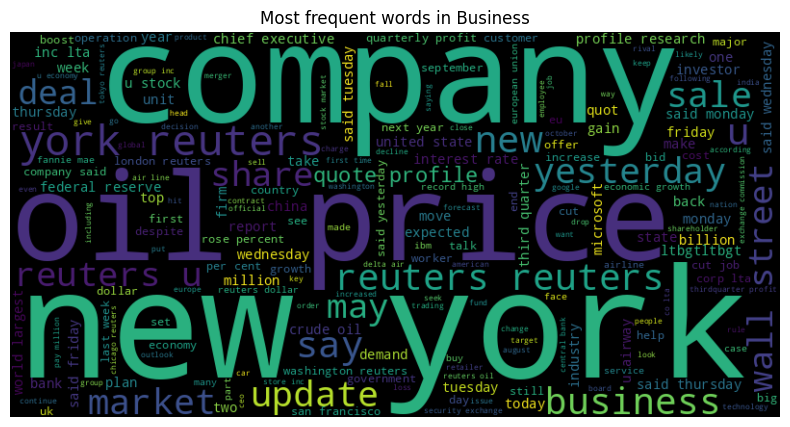

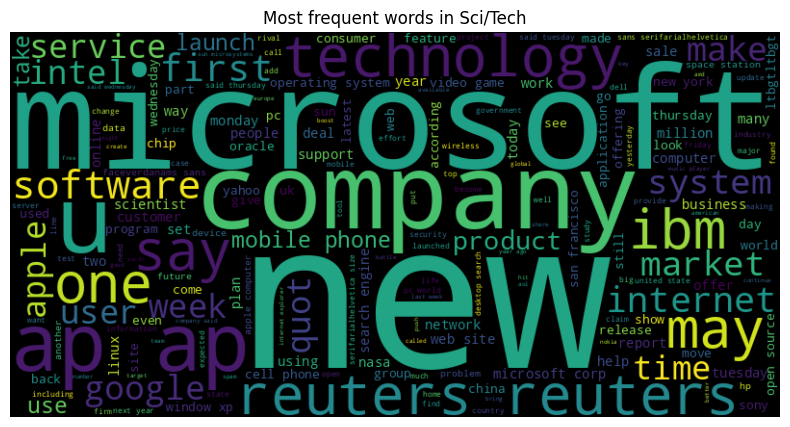

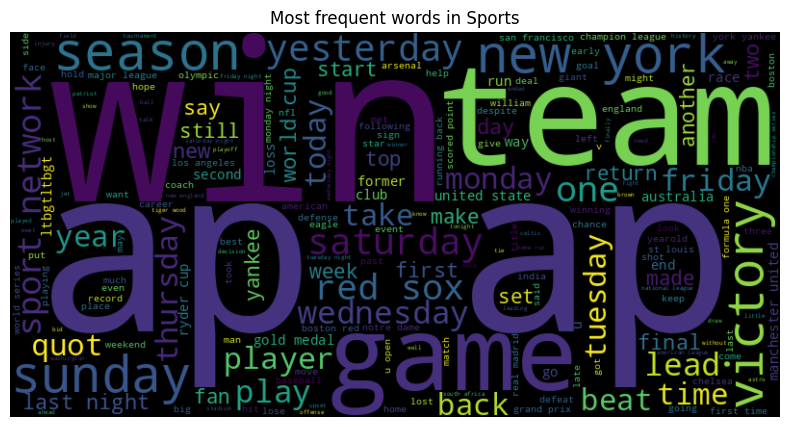

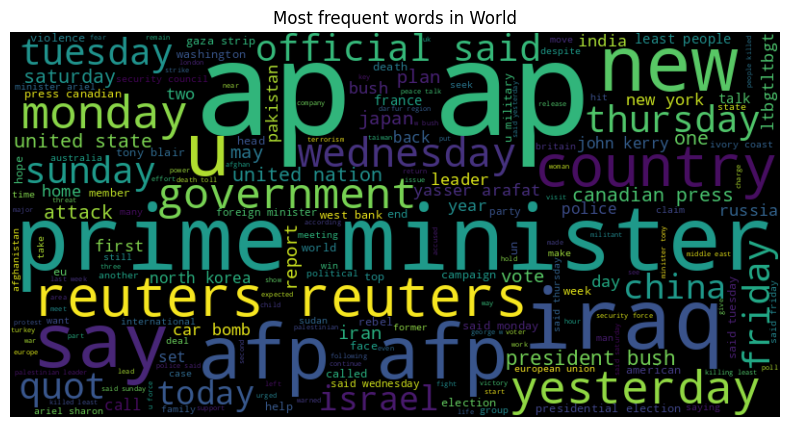

In [88]:
for label in train_df['label'].unique():
  plotWordCloud(train_df,label)

# TF-IDF Vectorization


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
vectorizer=TfidfVectorizer(max_features=10000)
X_train=vectorizer.fit_transform(train_df['clean_text'])
X_test=vectorizer.transform(test_df['clean_text'])

In [92]:
y_train=train_df['class']-1
y_test=test_df['class']-1

# ML Models

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [94]:
models={
    "Logistic Regression ": LogisticRegression(max_iter=1000),
    "Random Forest ": RandomForestClassifier(),
    "SVM":SVC(),
    "XGBoost":XGBClassifier(use_label_encoder=False,eval_metrics='mlogloss'),
    "LightGBM":LGBMClassifier()
}

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print("Training Traditional ML Models")
for name,model in models.items():
  print(f"\n {name}")
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test,pred)}")
  print(classification_report(y_test,pred,target_names=label_map.values()))

Training Traditional ML Models

 Logistic Regression 
Accuracy: 0.9132894736842105
              precision    recall  f1-score   support

       World       0.93      0.90      0.92      1900
      Sports       0.95      0.98      0.96      1900
    Business       0.88      0.88      0.88      1900
    Sci/Tech       0.89      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600


 Random Forest 
Accuracy: 0.8897368421052632
              precision    recall  f1-score   support

       World       0.90      0.89      0.90      1900
      Sports       0.92      0.97      0.94      1900
    Business       0.86      0.85      0.86      1900
    Sci/Tech       0.87      0.85      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600




# Neural Network with Keras


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
print("\nTraining Neural Network")

X_train_nn = X_train.toarray()
X_test_nn = X_test.toarray()
y_train_nn = to_categorical(y_train, num_classes=4)
y_test_nn = to_categorical(y_test, num_classes=4)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_nn.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_nn, y_train_nn, epochs=5, batch_size=128, validation_split=0.1)

loss, acc = model.evaluate(X_test_nn, y_test_nn)
print(f"\n Neural Network Accuracy: {acc:.4f}")